In [121]:
data=pd.read_csv('df_test (1).CSV')


In [124]:
data.head()
data.shape

(6700, 14)

In [130]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               6700 non-null   object 
 1   price              6700 non-null   float64
 2   bedrooms           6700 non-null   int64  
 3   grade              6700 non-null   int64  
 4   has_basement       6700 non-null   bool   
 5   living_in_m2       6700 non-null   float64
 6   renovated          6700 non-null   bool   
 7   nice_view          6700 non-null   bool   
 8   perfect_condition  6700 non-null   bool   
 9   real_bathrooms     6700 non-null   int64  
 10  has_lavatory       6700 non-null   bool   
 11  single_floor       6700 non-null   bool   
 12  month              6700 non-null   int64  
 13  quartile_zone      6700 non-null   int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 458.1+ KB


In [132]:
data.describe()
new_data=data.drop('date',axis=1)
new_data.head

<bound method NDFrame.head of          price  bedrooms  grade  has_basement  living_in_m2  renovated  \
0     305000.0         2      1         False      76.18046      False   
1     498000.0         3      2          True     210.88981      False   
2     590000.0         2      4         False     262.91549      False   
3     775000.0         3      3         False     159.79316      False   
4     350000.0         2      1         False      92.90300      False   
...        ...       ...    ...           ...           ...        ...   
6695  730000.0         3      3          True     188.59309      False   
6696  518000.0         3      4         False     234.11556      False   
6697  264000.0         3      2          True     169.08346      False   
6698  612125.0         1      2          True     155.14801      False   
6699  190000.0         2      1         False     117.05778      False   

      nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0         Fal

In [134]:
#Understanding the correlation between various features in the data set
correlation=new_data.corr()

<Axes: >

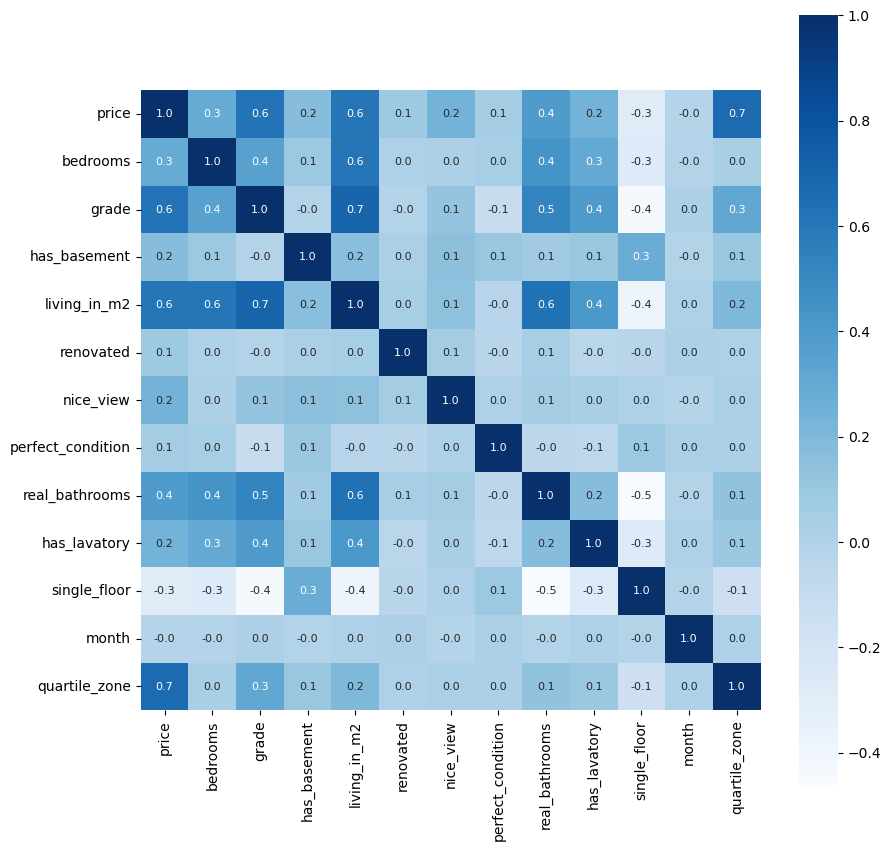

In [136]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [138]:
data['bedrooms'].value_counts()

bedrooms
2    3099
3    2606
1     995
Name: count, dtype: int64

In [140]:
data['grade'].value_counts()

grade
2    2916
3    1993
1     791
4     734
5     266
Name: count, dtype: int64

In [142]:
data['real_bathrooms'].value_counts()

real_bathrooms
2    3314
1    2815
3     571
Name: count, dtype: int64

In [144]:
data['month'].value_counts()

month
5     744
4     700
6     700
7     699
8     623
10    569
3     554
9     533
12    446
11    442
2     382
1     308
Name: count, dtype: int64

In [24]:
data['quartile_zone'].value_counts()

quartile_zone
2    1954
3    1724
1    1642
4    1380
Name: count, dtype: int64

In [58]:
X=new_data.drop('price',axis=1)
y=new_data['price']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [66]:
X_test.shape,X_train.shape

((1675, 12), (5025, 12))

In [158]:

def model_accuracy(model):
    model.fit(X_train,y_train)
    acc=model.score(X_test,y_test)
    print(str(model)+'----->'+str(acc))

In [160]:
from sklearn.linear_model import LinearRegression
linear_reg_model=LinearRegression()
model_accuracy(linear_reg_model)

LinearRegression()----->0.7487362036357648


In [162]:
from sklearn.linear_model import Lasso
lasso_model=Lasso()
model_accuracy(lasso_model)

Lasso()----->0.7487343437660815


In [164]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor()
model_accuracy(DT_model)

DecisionTreeRegressor()----->0.5250243970882889


In [166]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor()
model_accuracy(RF_model)

RandomForestRegressor()----->0.7292868352888955


In [168]:
from sklearn.model_selection import GridSearchCV

In [170]:
parameters={'n_estimators':[10,50,100],
            'criterion':['squared_error','absolute_error','poisson']}

In [172]:
grid_obj=GridSearchCV(estimator=RF_model, param_grid=parameters)
grid_fit=grid_obj.fit(X_train,y_train)
best_model=grid_fit.best_estimator_
best_model

RandomForestRegressor(criterion='absolute_error')

In [57]:
best_model.score(X_test,y_test)

0.7347682543846363

In [176]:
X_train.columns

Index(['bedrooms', 'grade', 'has_basement', 'living_in_m2', 'renovated',
       'nice_view', 'perfect_condition', 'real_bathrooms', 'has_lavatory',
       'single_floor', 'month', 'quartile_zone'],
      dtype='object')

In [111]:
best_model.predict([[3,2,0,248.98,0,0,0,2,1,0,4,3]])


C:\Users\Chirath Rasandun\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([508862.5])

In [174]:
import pickle
with open('House_price_predictor.pickle','wb') as file:
     pickle.dump(best_model,file)